In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the CSV file
file_path = r"C:\Users\kpree\OneDrive\Desktop\bing_poc\bing_maps_telemetry_50000.csv"  
df = pd.read_csv(file_path)

In [3]:
# Basic info
print("Shape of data:", df.shape)

Shape of data: (50000, 13)


In [4]:
print("\nData types:\n", df.dtypes)


Data types:
 timestamp           object
sessionId           object
userId              object
apiEndpoint         object
operation           object
status              object
httpStatusCode       int64
durationMs           int64
latencyMs            int64
error               object
browser             object
os                  object
screenResolution    object
dtype: object


In [5]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 timestamp               0
sessionId               0
userId                  0
apiEndpoint             0
operation               0
status                  0
httpStatusCode          0
durationMs              0
latencyMs               0
error               24963
browser                 0
os                      0
screenResolution        0
dtype: int64


In [6]:
print("\nSummary statistics:\n", df.describe(include='all'))


Summary statistics:
                    timestamp                             sessionId    userId  \
count                  50000                                 50000     50000   
unique                 49527                                 50000      8962   
top     2025-06-06T09:22:13Z  152fa3f7-c453-4cfc-83bc-7adc59bf451f  user2471   
freq                       3                                     1        16   
mean                     NaN                                   NaN       NaN   
std                      NaN                                   NaN       NaN   
min                      NaN                                   NaN       NaN   
25%                      NaN                                   NaN       NaN   
50%                      NaN                                   NaN       NaN   
75%                      NaN                                   NaN       NaN   
max                      NaN                                   NaN       NaN   

                 

In [7]:
print(df[['httpStatusCode', 'durationMs', 'latencyMs']].describe())

       httpStatusCode    durationMs     latencyMs
count    50000.000000  50000.000000  50000.000000
mean       317.508080    274.827700     85.452700
std        121.873239    129.946267     37.845024
min        200.000000     50.000000     20.000000
25%        200.000000    162.000000     53.000000
50%        400.000000    274.000000     86.000000
75%        403.000000    387.000000    118.000000
max        500.000000    500.000000    150.000000


In [8]:
categorical_cols = ['sessionId', 'userId', 'apiEndpoint', 'operation', 'status', 'error', 'browser', 'os', 'screenResolution']
print("\nCategorical Summary:")
for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(5))  # top 5 values


Categorical Summary:

sessionId unique values: 50000
sessionId
152fa3f7-c453-4cfc-83bc-7adc59bf451f    1
c00c0233-e165-4dad-a2b4-5aee969976b8    1
354b9c7b-1234-49a6-85da-1e0dfaa16f3d    1
3fe768c0-1857-45fa-9f1b-b49931bc9c4a    1
a7282c27-19b8-4440-86a2-5b8cbea8435d    1
Name: count, dtype: int64

userId unique values: 8962
userId
user2471    16
user3123    15
user8942    15
user9924    15
user4888    15
Name: count, dtype: int64

apiEndpoint unique values: 4
apiEndpoint
https://dev.virtualearth.net/REST/v1/Locations      12691
https://dev.virtualearth.net/REST/v1/Routes         12455
https://dev.virtualearth.net/REST/v1/Imagery/Map    12449
https://dev.virtualearth.net/REST/v1/Elevation      12405
Name: count, dtype: int64

operation unique values: 4
operation
Geocode         12691
GetRoute        12455
Unknown         12449
GetElevation    12405
Name: count, dtype: int64

status unique values: 2
status
Failure    25037
Success    24963
Name: count, dtype: int64

error unique values

In [9]:
df.head()

,timestamp,sessionId,userId,apiEndpoint,operation,status,httpStatusCode,durationMs,latencyMs,error,browser,os,screenResolution
0,2025-06-09T09:42:24Z,152fa3f7-c453-4cfc-83bc-7adc59bf451f,user5204,https://dev.virtualearth.net/REST/v1/Elevation,GetElevation,Success,200,424,65,NaN,Chrome,Windows 11,1440x900
1,2025-06-09T07:57:03Z,dd2a7f82-bc62-4bf6-a611-bd76aba5285b,user2110,https://dev.virtualearth.net/REST/v1/Locations,Geocode,Success,200,491,137,NaN,Edge,Windows 11,1366x768
2,2025-06-10T22:16:04Z,6954abe9-4127-4054-9061-77120c597e3d,user3764,https://dev.virtualearth.net/REST/v1/Imagery/Map,Unknown,Failure,403,323,96,QuotaExceeded,Firefox,macOS,1920x1080
3,2025-06-19T17:01:15Z,244f3bc6-8861-4bcb-a91f-8d2e857f1ff6,user8724,https://dev.virtualearth.net/REST/v1/Locations,Geocode,Failure,400,158,107,QuotaExceeded,Chrome,Linux,1366x768
4,2025-06-06T21:43:40Z,41aa6826-df29-4d73-b566-660d7a2d84c2,user8446,https://dev.virtualearth.net/REST/v1/Locations,Geocode,Success,200,141,45,NaN,Safari,macOS,1366x768


In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['time_only'] = df['timestamp'].dt.time.astype(str) + "+00:00"
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

In [12]:
df.head()

,timestamp,sessionId,userId,apiEndpoint,operation,status,httpStatusCode,durationMs,latencyMs,error,browser,os,screenResolution,date,hour,day_of_week,time_only
0,2025-06-09 09:42:24+00:00,152fa3f7-c453-4cfc-83bc-7adc59bf451f,user5204,https://dev.virtualearth.net/REST/v1/Elevation,GetElevation,Success,200,424,65,NaN,Chrome,Windows 11,1440x900,2025-06-09,9,Monday,09:42:24+00:00
1,2025-06-09 07:57:03+00:00,dd2a7f82-bc62-4bf6-a611-bd76aba5285b,user2110,https://dev.virtualearth.net/REST/v1/Locations,Geocode,Success,200,491,137,NaN,Edge,Windows 11,1366x768,2025-06-09,7,Monday,07:57:03+00:00
2,2025-06-10 22:16:04+00:00,6954abe9-4127-4054-9061-77120c597e3d,user3764,https://dev.virtualearth.net/REST/v1/Imagery/Map,Unknown,Failure,403,323,96,QuotaExceeded,Firefox,macOS,1920x1080,2025-06-10,22,Tuesday,22:16:04+00:00
3,2025-06-19 17:01:15+00:00,244f3bc6-8861-4bcb-a91f-8d2e857f1ff6,user8724,https://dev.virtualearth.net/REST/v1/Locations,Geocode,Failure,400,158,107,QuotaExceeded,Chrome,Linux,1366x768,2025-06-19,17,Thursday,17:01:15+00:00
4,2025-06-06 21:43:40+00:00,41aa6826-df29-4d73-b566-660d7a2d84c2,user8446,https://dev.virtualearth.net/REST/v1/Locations,Geocode,Success,200,141,45,NaN,Safari,macOS,1366x768,2025-06-06,21,Friday,21:43:40+00:00


In [19]:
from datetime import time

df['time_only'] = df['timestamp'].dt.time

df.dtypes

timestamp           datetime64[ns, UTC]
sessionId                        object
userId                           object
apiEndpoint                      object
operation                        object
status                           object
httpStatusCode                    int64
durationMs                        int64
latencyMs                         int64
error                            object
browser                          object
os                               object
screenResolution                 object
date                             object
hour                              int32
day_of_week                      object
time_only                        object
dtype: object

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

df['hour'] = df['timestamp'].dt.hour
plt.figure(figsize=(12,5))
sns.countplot(x='hour', data=df)
plt.title('Requests by Hour of Day')
plt.show()

# Performance Over Time

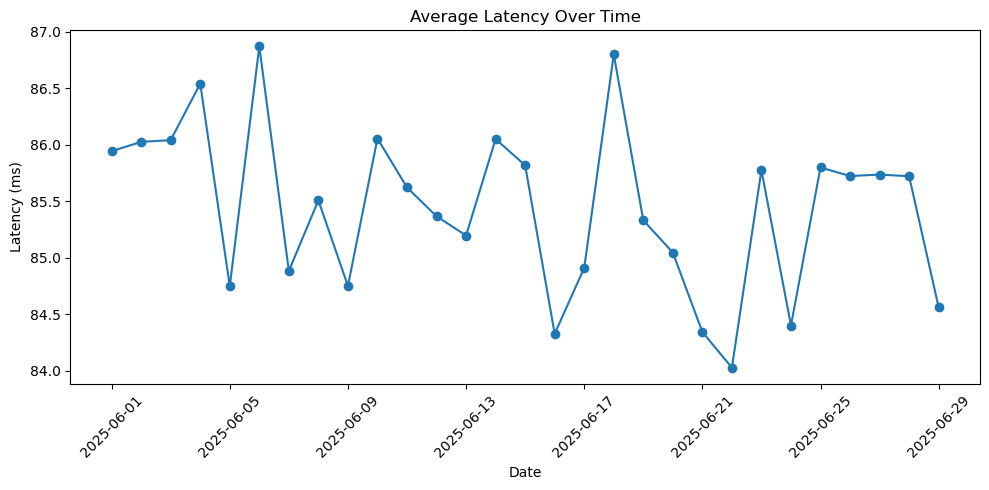

In [23]:
daily_perf = df.groupby('date')['latencyMs'].mean()

plt.figure(figsize=(10,5))
daily_perf.plot(marker='o')
plt.title('Average Latency Over Time')
plt.xlabel('Date')
plt.ylabel('Latency (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

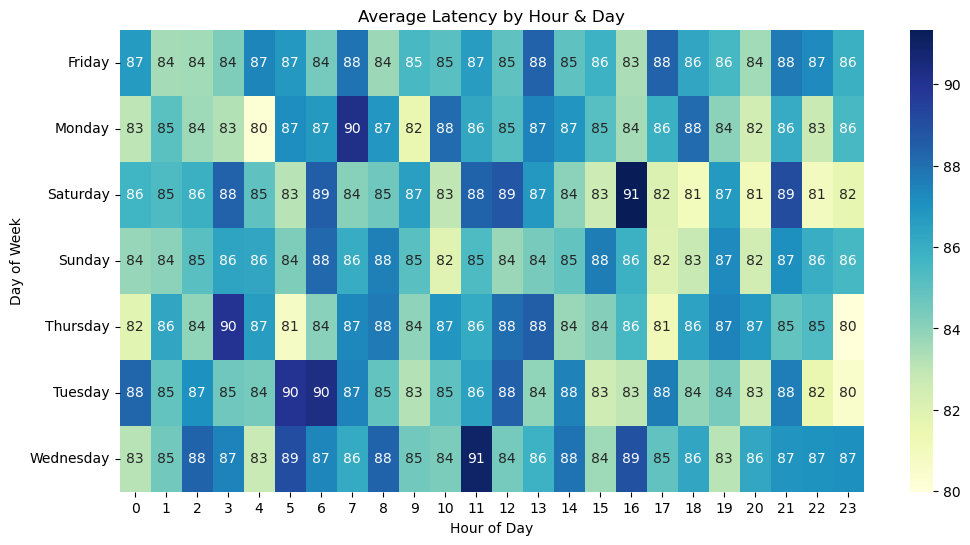

In [25]:
heatmap_data = df.groupby(['day_of_week', 'hour'])['latencyMs'].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Latency by Hour & Day')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.show()

# Performance by API Operation / Endpoint

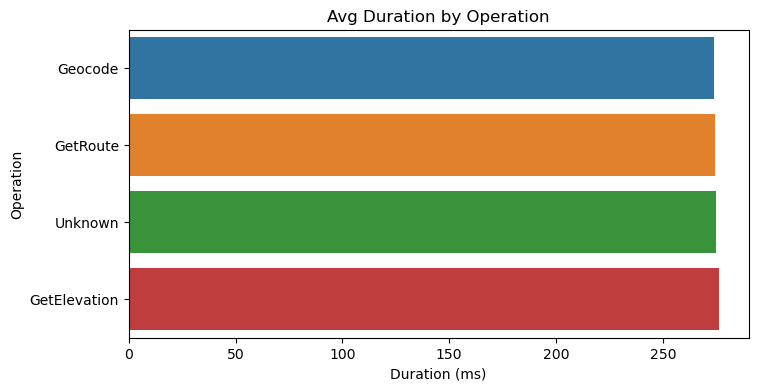

In [27]:
op_perf = df.groupby('operation')['durationMs'].mean().sort_values()

plt.figure(figsize=(8,4))
sns.barplot(x=op_perf.values, y=op_perf.index)
plt.title("Avg Duration by Operation")
plt.xlabel("Duration (ms)")
plt.ylabel("Operation")
plt.show()

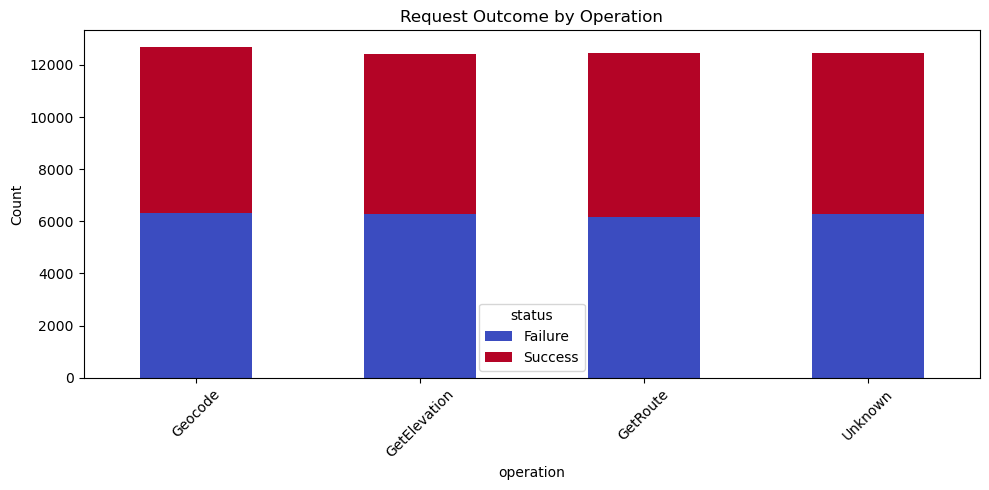

In [29]:
status_counts = df.groupby(['operation', 'status']).size().unstack(fill_value=0)
status_counts.plot(kind='bar', stacked=True, figsize=(10,5), colormap='coolwarm')
plt.title('Request Outcome by Operation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
df['status'].count()

50000

# Failure status

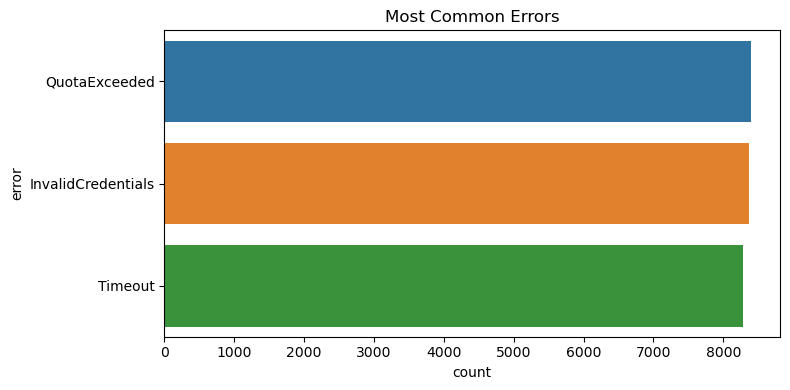

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(data=df[df['status'] == 'Failure'], y='error', order=df['error'].value_counts().index)
plt.title("Most Common Errors")
plt.tight_layout()
plt.show()

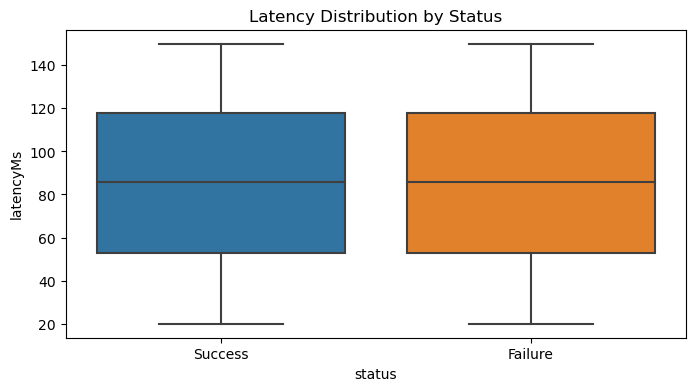

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(x='status', y='latencyMs', data=df)
plt.title("Latency Distribution by Status")
plt.show()

# Performance by Device / Environment

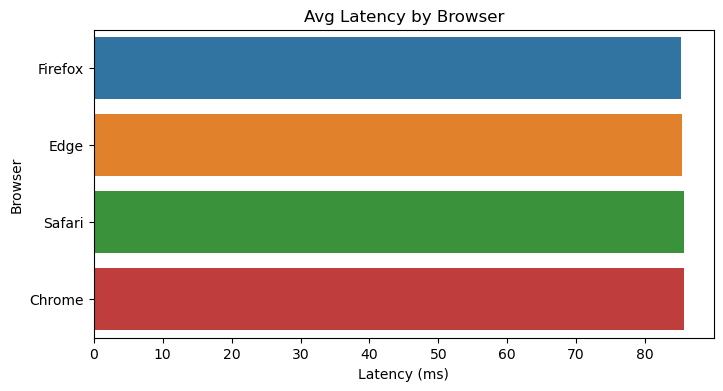

In [33]:
browser_perf = df.groupby('browser')['latencyMs'].mean().sort_values()

plt.figure(figsize=(8,4))
sns.barplot(x=browser_perf.values, y=browser_perf.index)
plt.title("Avg Latency by Browser")
plt.xlabel("Latency (ms)")
plt.ylabel("Browser")
plt.show()

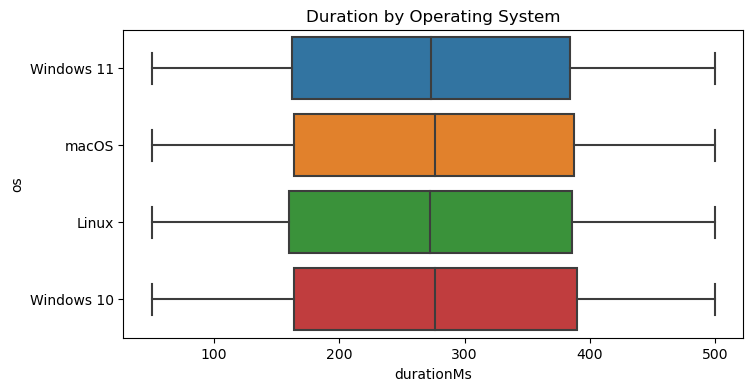

In [34]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='durationMs', y='os')
plt.title("Duration by Operating System")
plt.show()

# User Behavior Impact

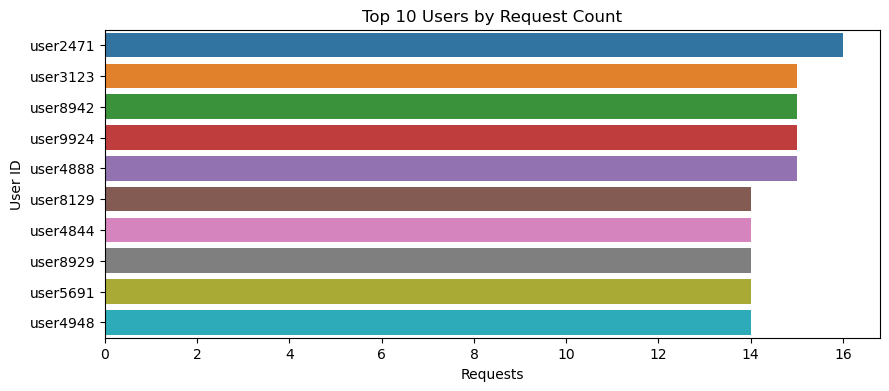

In [35]:
top_users = df['userId'].value_counts().head(10)

plt.figure(figsize=(10,4))
sns.barplot(x=top_users.values, y=top_users.index)
plt.title("Top 10 Users by Request Count")
plt.xlabel("Requests")
plt.ylabel("User ID")
plt.show()

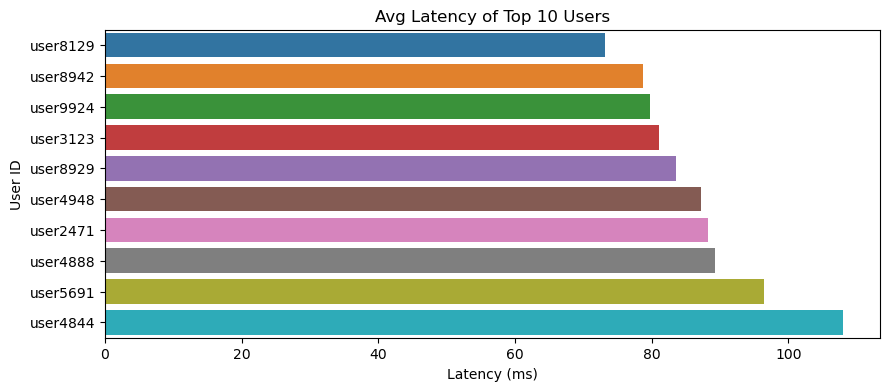

In [36]:
latency_top_users = df[df['userId'].isin(top_users.index)].groupby('userId')['latencyMs'].mean().sort_values()

plt.figure(figsize=(10,4))
sns.barplot(x=latency_top_users.values, y=latency_top_users.index)
plt.title("Avg Latency of Top 10 Users")
plt.xlabel("Latency (ms)")
plt.ylabel("User ID")
plt.show()

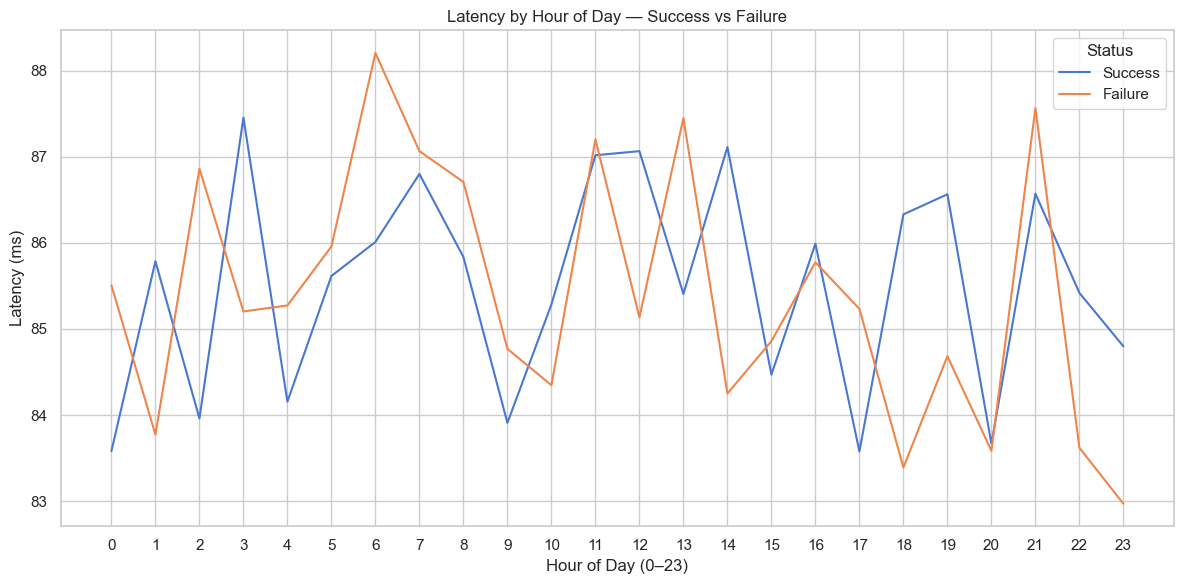

In [38]:
# Ensure necessary time columns
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

# Plot style
sns.set(style='whitegrid', palette='muted')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='latencyMs', hue='status', errorbar=None)

plt.title("Latency by Hour of Day — Success vs Failure")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Latency (ms)")
plt.legend(title="Status")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

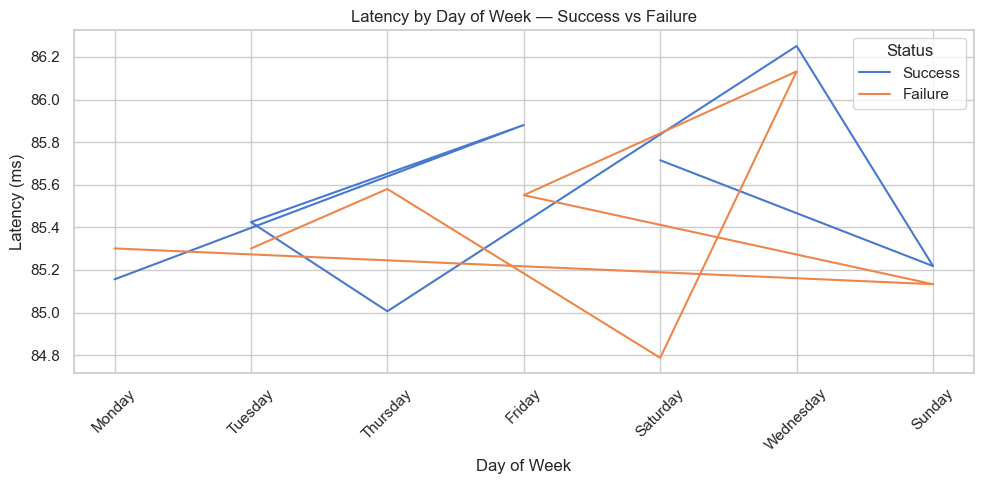

In [39]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='day_of_week', y='latencyMs', hue='status', errorbar=None, sort=False)

plt.title("Latency by Day of Week — Success vs Failure")
plt.xlabel("Day of Week")
plt.ylabel("Latency (ms)")
plt.xticks(rotation=45)
plt.legend(title="Status")
plt.tight_layout()
plt.show()


In [42]:
failures = df[df['status'] == 'Failure']
print("Total failures:", len(failures))

Total failures: 25037


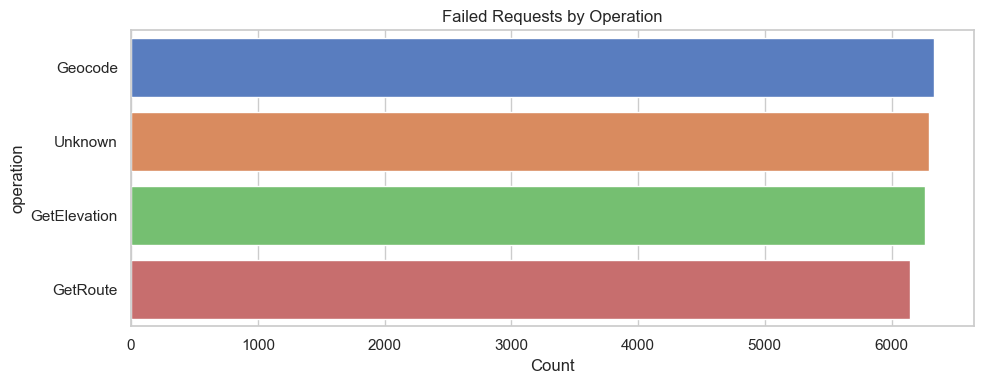

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.countplot(y='operation', data=failures, order=failures['operation'].value_counts().index)
plt.title("Failed Requests by Operation")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


# Technical Factors Causing Failures


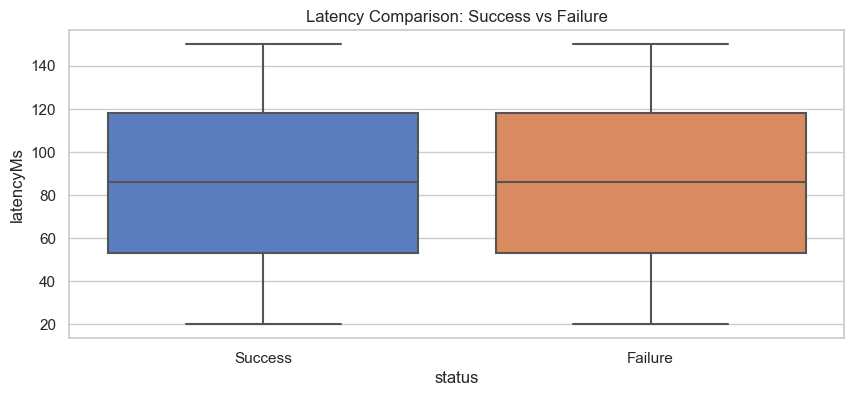

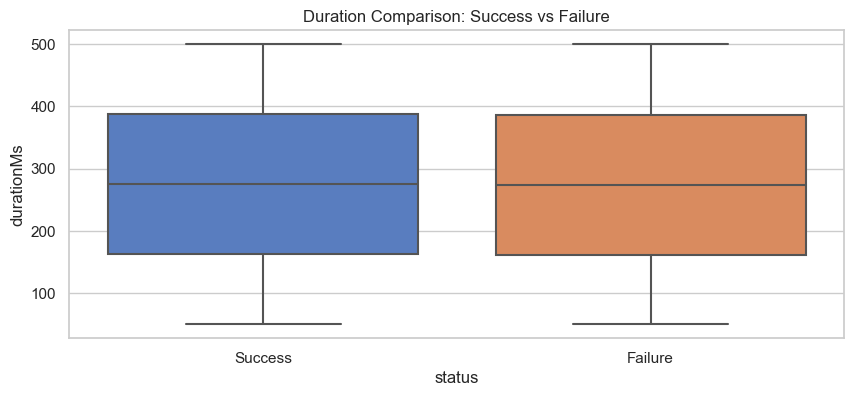

In [44]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='status', y='latencyMs', data=df)
plt.title("Latency Comparison: Success vs Failure")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='status', y='durationMs', data=df)
plt.title("Duration Comparison: Success vs Failure")
plt.show()

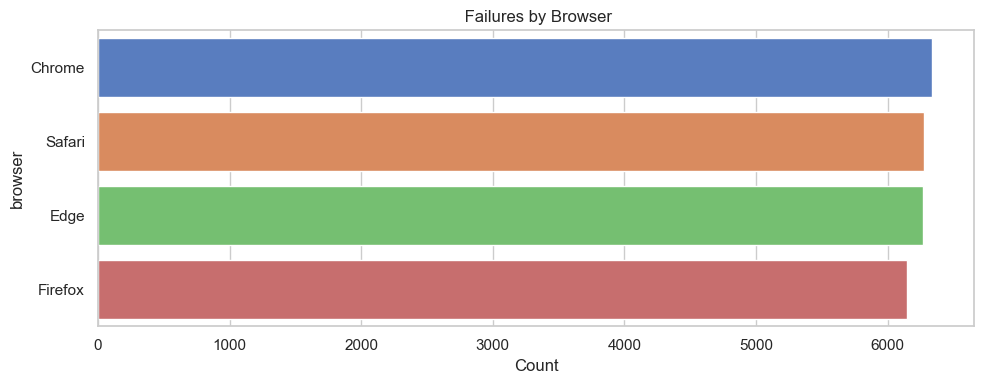

In [45]:
plt.figure(figsize=(10, 4))
sns.countplot(y='browser', data=failures, order=failures['browser'].value_counts().index)
plt.title(" Failures by Browser")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

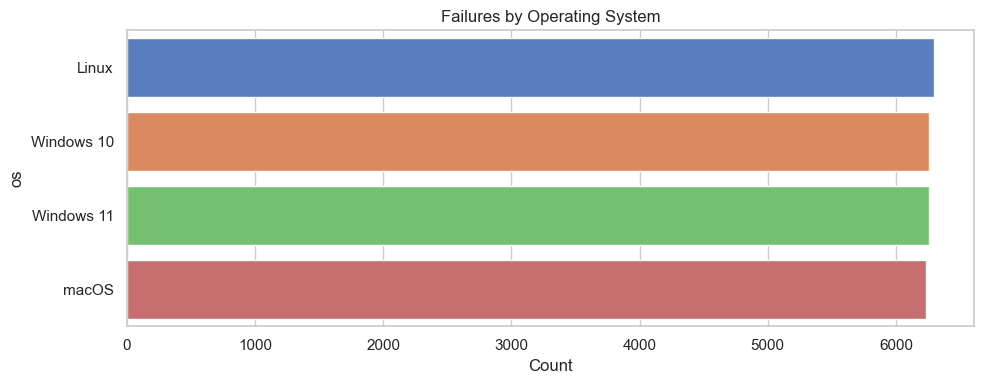

In [46]:
plt.figure(figsize=(10, 4))
sns.countplot(y='os', data=failures, order=failures['os'].value_counts().index)
plt.title("Failures by Operating System")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


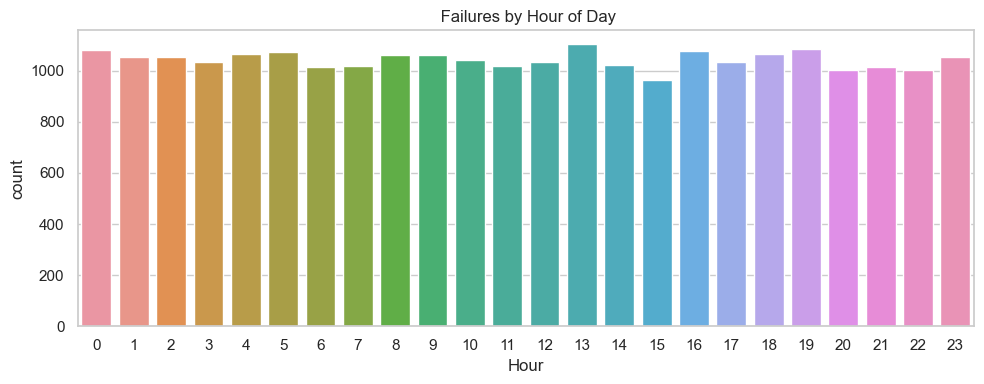

In [47]:
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=failures)
plt.title(" Failures by Hour of Day")
plt.xlabel("Hour")
plt.tight_layout()
plt.show()

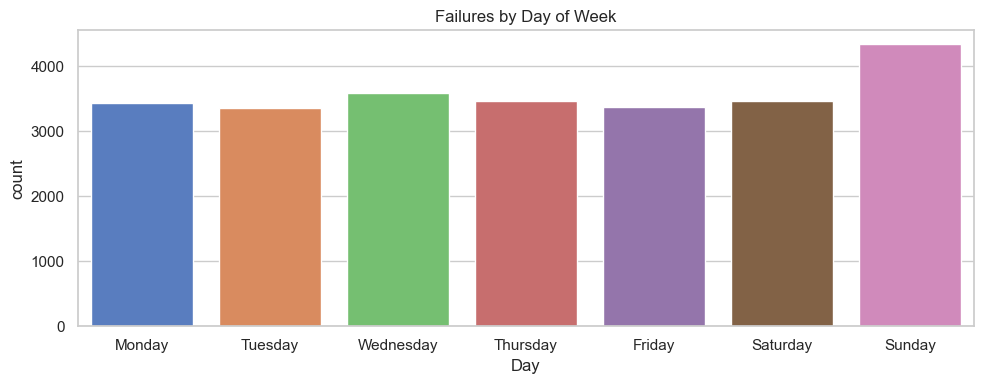

In [48]:
plt.figure(figsize=(10, 4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='day_of_week', data=failures, order=order)
plt.title("Failures by Day of Week")
plt.xlabel("Day")
plt.tight_layout()
plt.show()


C:\Users\kpree\AppData\Local\Temp\ipykernel_31592\1228978058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failures['date'] = failures['timestamp'].dt.date


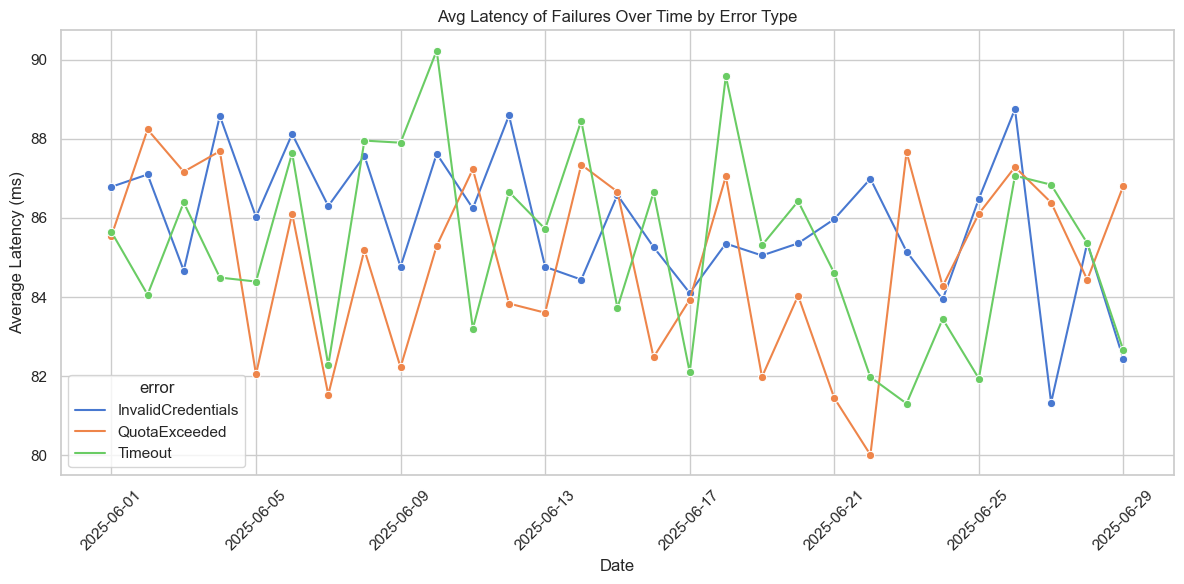

In [51]:
# Group by timestamp date and error type to get average latency
failures['date'] = failures['timestamp'].dt.date
line_data = failures.groupby(['date', 'error'])['latencyMs'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=line_data, x='date', y='latencyMs', hue='error', marker='o')
plt.title("Avg Latency of Failures Over Time by Error Type")
plt.xlabel("Date")
plt.ylabel("Average Latency (ms)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()